In [2]:
# google conceptual captions (is the dataset)
!pip install datasets
from datasets import load_dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip  # word embeddings
#!unzip glove.42B.300d.zip
#!rm glove.418.300d.zip

--2024-06-26 20:56:20--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2024-06-26 20:56:21--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2024-06-26 20:56:21--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [4]:
!unzip glove.42B.300d.zip

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3 # imagenet trained feature extractor
import tensorflow.keras.applications.inception_v3 as inception
from tensorflow.keras.models import Model
from tensorflow.keras import Input
import tensorflow.keras.preprocessing.image as tf_image
import pandas as pd
import numpy as np

In [6]:
encode_model = InceptionV3(weights='imagenet')
# not taking last two layers of model, as used for classification, only taking feature extraction layers
encode_model = Model(encode_model.input, encode_model.layers[-2].output)
WIDTH = 299
HEIGHT = 299
OUTPUT_DIM = 2048
START = "startseq"
STOP = "endseq"
EPOCHS = 10
preprocess_input = inception.preprocess_input

96112376/96112376 [==============================] - 5s 0us/step


In [46]:
def encodeImage(img):
  img = img.resize((WIDTH, HEIGHT))
  x = tf_image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  x = encode_model.predict(x)
  x = np.reshape(x, OUTPUT_DIM)
  return x

In [38]:
tf_image.resize

AttributeError: module 'tensorflow.keras.preprocessing.image' has no attribute 'resize'

In [8]:
#!wget https://att-c.udemycdn.com/2024-03-06_19-16-08-b4c87991381afb64d468ba22b356e80b/original.zip?response-content-disposition=attachment%3B+filename%3Dimages%2B%25282%2529.zip&Expires=1719446268&Signature=rnCzSOZ8Vsy5740yLIUUBFm3blLkJ1wM-0hGvVT2xDC4fUhRS4zcTedEmZot1ZpqCMPwDR8f9Z8O8OvT0PD3XH~HeaAfSSIpMDkC88gDBbGpUspsHKxdYN0TlyTnu37GrJGatURmmVXrFnObk6nveuOXMt7nrba4Oy5k86c8IqAHLf~EFtHHDan7O7DSR9SMuFoHBnMVz1bamTv416I3c3Vxir92pA2MdA5eZsuN1S5sDRtH9k8RSWP3J445gvhx9FUTrg3IGnoz2pMMIZDGQB6LjbgYhtKNcyeCCwh2AHj81GDsRXVqzDB1DzkPTIO7WK3Ngtrg9eePn54Zf5wyJA__&Key-Pair-Id=K3MG148K9RIRF4

In [9]:
#ds_name = "coco"  # change the dataset name here
#dataset = load_dataset("MMInstruction/M3IT", ds_name)

In [10]:
#https://huggingface.co/datasets/google-research-datasets/conceptual_captions/resolve/main/labeled/train-00000-of-00003.parquet?download=true

In [11]:
data=pd.read_csv('/content/drive/MyDrive/image_caption_map+(2).csv')
data.head()

,caption,url,file_name
0,author : a life in photography -- in pictures,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,photograph of the sign being repaired by brave...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg
2,the player staring intently at a computer scre...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg
3,globes : the green 3d person carrying in hands...,https://www.featurepics.com/StockImage/2009031...,5.jpg
4,the - bedroom stone cottage can sleep people,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg


In [12]:
data['caption']=data['caption'].apply(lambda x:START + ' ' + x + ' ' + STOP)
data.head()

,caption,url,file_name
0,startseq author : a life in photography -- in ...,https://i.pinimg.com/736x/66/01/6c/66016c3ba27...,1.jpg
1,startseq photograph of the sign being repaired...,http://indianapolis-photos.funcityfinder.com/f...,3.jpg
2,startseq the player staring intently at a comp...,http://www.abc.net.au/news/image/9066492-3x2-7...,4.jpg
3,startseq globes : the green 3d person carrying...,https://www.featurepics.com/StockImage/2009031...,5.jpg
4,startseq the - bedroom stone cottage can sleep...,http://i.dailymail.co.uk/i/pix/2014/11/05/1415...,6.jpg


In [20]:
data['caption'][8], data['file_name'][8]

('startseq a man holds what is believed to be some of the debris that caused damage to vehicles monday afternoon after airliner returned to airport following problems after take off . endseq',
 '11.jpg')

In [13]:
data.shape

(1832, 3)

In [25]:
#!mkdir /content/drive/MyDrive/captions/
#!unzip -d /content/drive/MyDrive/captions/ /content/drive/MyDrive/images+\(2\).zip

Archive:  /content/drive/MyDrive/images+(2).zip
   creating: /content/drive/MyDrive/captions/content/images/
  inflating: /content/drive/MyDrive/captions/content/images/326.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/1480.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/1217.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/1671.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/1262.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/1943.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/900.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/1701.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/800.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/1544.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/1731.jpg  
  inflating: /content/drive/MyDrive/captions/content/images/74.jpg  
  inflating: /content/drive/MyDrive/captions

In [52]:
!ls /content/drive/MyDrive/captions/content/images/* | cut -f8 -d "/" | sort -n | head

1.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
11.jpg
12.jpg


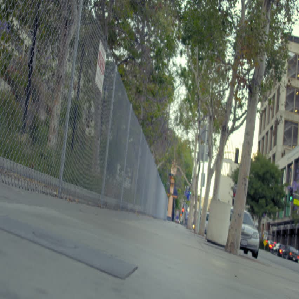

In [45]:
image_path = '/content/drive/MyDrive/captions/content/images/2075.jpg'
img = tf_image.load_img(image_path, target_size=(HEIGHT, WIDTH))
img.resize((HEIGHT, WIDTH))

In [53]:
remove_these = []
encoded_images = {}

for i in range(data.shape[0]):
  image_path = '/content/drive/MyDrive/captions/content/images/' + data['file_name'][i]
  print(image_path)
  try:
    img = tf_image.load_img(image_path, target_size=(HEIGHT, WIDTH))
    encoded_images[int(data['file_name'][i].split('.')[0])] = encodeImage(img)
  except:
    print('remove: ', i)
    remove_these.append(data['file_name'][i])

/content/drive/MyDrive/captions/content/images/1.jpg
1/1 [==============================] - 0s 260ms/step
/content/drive/MyDrive/captions/content/images/3.jpg
1/1 [==============================] - 0s 252ms/step
/content/drive/MyDrive/captions/content/images/4.jpg
1/1 [==============================] - 0s 247ms/step
/content/drive/MyDrive/captions/content/images/5.jpg
1/1 [==============================] - 0s 265ms/step
/content/drive/MyDrive/captions/content/images/6.jpg
1/1 [==============================] - 0s 247ms/step
/content/drive/MyDrive/captions/content/images/7.jpg
1/1 [==============================] - 0s 246ms/step
/content/drive/MyDrive/captions/content/images/8.jpg
1/1 [==============================] - 0s 273ms/step
/content/drive/MyDrive/captions/content/images/9.jpg
1/1 [==============================] - 0s 244ms/step
/content/drive/MyDrive/captions/content/images/11.jpg
1/1 [==============================] - 0s 254ms/step
/content/drive/MyDrive/captions/content/image

In [56]:
len(remove_these)
data = data[-data['file_name'].isin(remove_these)]
data.shape

(1790, 3)